In [35]:
from typing import List

import numpy as np
import pandas as pd

class MassObject:
    name: str
    radius: float
    mass: float
    position: np.ndarray
    linear_velocity: np.ndarray

    def __init__(self, name, radius, mass, position, linear_velocity):
        self.linear_velocity = linear_velocity
        self.position = position
        self.mass = mass
        self.radius = radius
        self.name = name

In [36]:
G = 10**5

def calc_step(delta: float, body: MassObject, others: List[MassObject]) -> MassObject:
    force = np.array((0., 0.))
    for other in others:
        distance = np.linalg.norm(body.position - other.position)
        direction = (other.position - body.position)/distance
        force += direction * ((G * other.mass * body.mass)/(distance**2))
    acceleration = force/body.mass
    velocity_delta = acceleration * delta
    linear_velocity = velocity_delta + body.linear_velocity
    position_delta = linear_velocity * delta
    return MassObject(body.name, body.radius, body.mass, position_delta+body.position, linear_velocity)

In [37]:
a = MassObject("A", 9., 100., np.array((100., 0.)), np.array((0., -100.)))
b = MassObject("B", 9., 100., np.array((-100., 0.)), np.array((0., 100.)))
a_changes: List[MassObject] = [a]
b_changes: List[MassObject] = [b]
DELTA = 1/60

In [38]:
for i in range(550):
    snapshot_a = [b_changes[-1]]
    snapshot_b = [a_changes[-1]]
    a_changes.append(calc_step(DELTA, a_changes[-1], snapshot_a))
    b_changes.append(calc_step(DELTA, b_changes[-1], snapshot_b))

In [39]:
star_a = pd.read_csv("../data/StarA.tsv", sep="\t", header=0)
print(star_a.keys())
error = {"position": [], "linear_velocity": []}
for index, data in star_a.iterrows():
    position = np.array((data["Position X"], data["Position Y"]))
    linear_velocity = np.array((data["Linear velocity X"], data["Linear velocity Y"]))
    error["position"].append(position - a_changes[index].position)
    error["linear_velocity"].append(linear_velocity - a_changes[index].linear_velocity)
ds_error = pd.DataFrame(error)

Index(['Name', 'Position X', 'Position Y', 'Linear velocity X',
       'Linear velocity Y'],
      dtype='object')


In [40]:
print(ds_error)

                                              position  \
0                                           [0.0, 0.0]   
1     [-1.356336805713454e-05, 1.0172526036633656e-05]   
2     [-3.417969537622412e-05, 2.0674757993610626e-05]   
3    [-1.6543805486435303e-05, 2.5864440091893925e-05]   
4     [1.6429973754839011e-06, 1.0518432294936986e-05]   
..                                                 ...   
519      [0.036188479316916045, -0.012621521308169292]   
520      [0.036929707338321016, -0.015648770706214066]   
521        [0.03747323331193986, -0.01911230955967369]   
522       [0.037639014446301466, -0.02310645681902912]   
523       [0.03726033544180485, -0.027657832978569274]   

                                       linear_velocity  
0                                           [0.0, 0.0]  
1                       [-3.1789144294691596e-07, 0.0]  
2    [-1.9714030621287293e-06, -3.1058289664542826e...  
3    [-3.2861172343245926e-06, -1.4242495609551042e...  
4     [-5.51729256

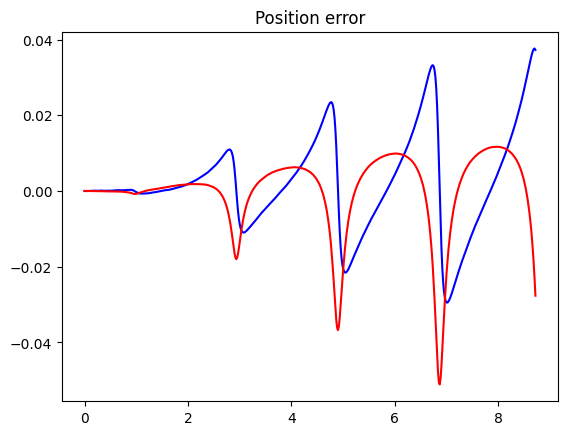

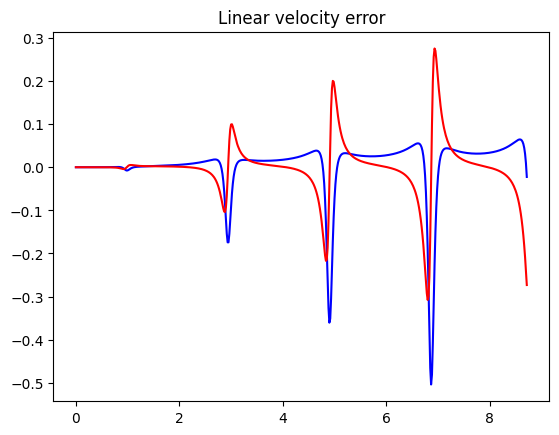

In [56]:
import matplotlib.pyplot as plt

t = [DELTA * x for x in range(len(error["position"]))]
plt.subplots(1)
plt.plot(t, [x[0] for x in error["position"]], "b", t, [x[1] for x in error["position"]], "r")
plt.title("Position error")
plt.subplots(1)
plt.plot(t, [x[0] for x in error["linear_velocity"]], "b", t, [x[1] for x in error["linear_velocity"]], "r")
plt.title("Linear velocity error")
plt.show()